In [65]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import pandas as pd

In [67]:
df = pd.read_csv("/content/drive/MyDrive/Time Series/gold_data.csv")

In [68]:
df

,Date,Gold Price
0,31-08-2008,1190
1,30-08-2008,1188
2,29-08-2008,1186
3,30-09-2008,1350
4,29-09-2008,1317
...,...,...
5649,05-05-2024,7068
5650,04-05-2024,7068
5651,03-05-2024,7039
5652,02-05-2024,7069


In [69]:
df.isnull().sum()

Date          0
Gold Price    0
dtype: int64

In [70]:
df.dtypes

Date          object
Gold Price     int64
dtype: object

In [71]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [72]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [73]:
df.rename(columns={'Gold Price':'Gold_Price'}, inplace = True)

In [74]:
df

,Date,Gold_Price,Year,Month,Day
0,2008-08-31,1190,2008,8,31
1,2008-08-30,1188,2008,8,30
2,2008-08-29,1186,2008,8,29
3,2008-09-30,1350,2008,9,30
4,2008-09-29,1317,2008,9,29
...,...,...,...,...,...
5649,2024-05-05,7068,2024,5,5
5650,2024-05-04,7068,2024,5,4
5651,2024-05-03,7039,2024,5,3
5652,2024-05-02,7069,2024,5,2


In [75]:
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]


In [76]:
train_data

,Date,Gold_Price,Year,Month,Day
0,2008-08-31,1190,2008,8,31
1,2008-08-30,1188,2008,8,30
2,2008-08-29,1186,2008,8,29
3,2008-09-30,1350,2008,9,30
4,2008-09-29,1317,2008,9,29
...,...,...,...,...,...
4518,2021-04-20,4775,2021,4,20
4519,2021-04-19,4748,2021,4,19
4520,2021-04-18,4733,2021,4,18
4521,2021-04-17,4733,2021,4,17


In [77]:
test_data

,Date,Gold_Price,Year,Month,Day
4523,2021-04-15,4722,2021,4,15
4524,2021-04-14,4674,2021,4,14
4525,2021-04-13,4695,2021,4,13
4526,2021-04-12,4647,2021,4,12
4527,2021-04-11,4661,2021,4,11
...,...,...,...,...,...
5649,2024-05-05,7068,2024,5,5
5650,2024-05-04,7068,2024,5,4
5651,2024-05-03,7039,2024,5,3
5652,2024-05-02,7069,2024,5,2


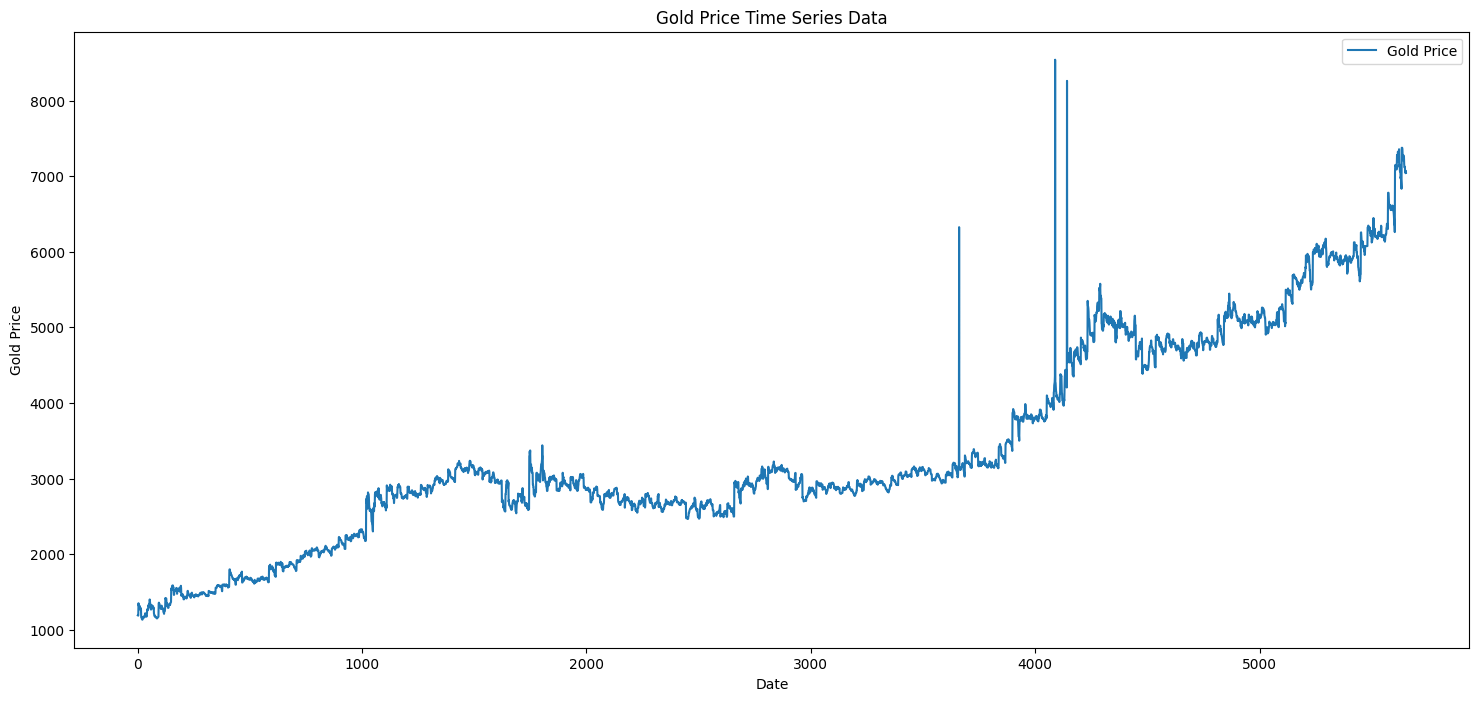

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.plot(df.index, df['Gold_Price'], label='Gold Price')
plt.title('Gold Price Time Series Data')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [79]:
df.dtypes

Date          datetime64[ns]
Gold_Price             int64
Year                   int32
Month                  int32
Day                    int32
dtype: object

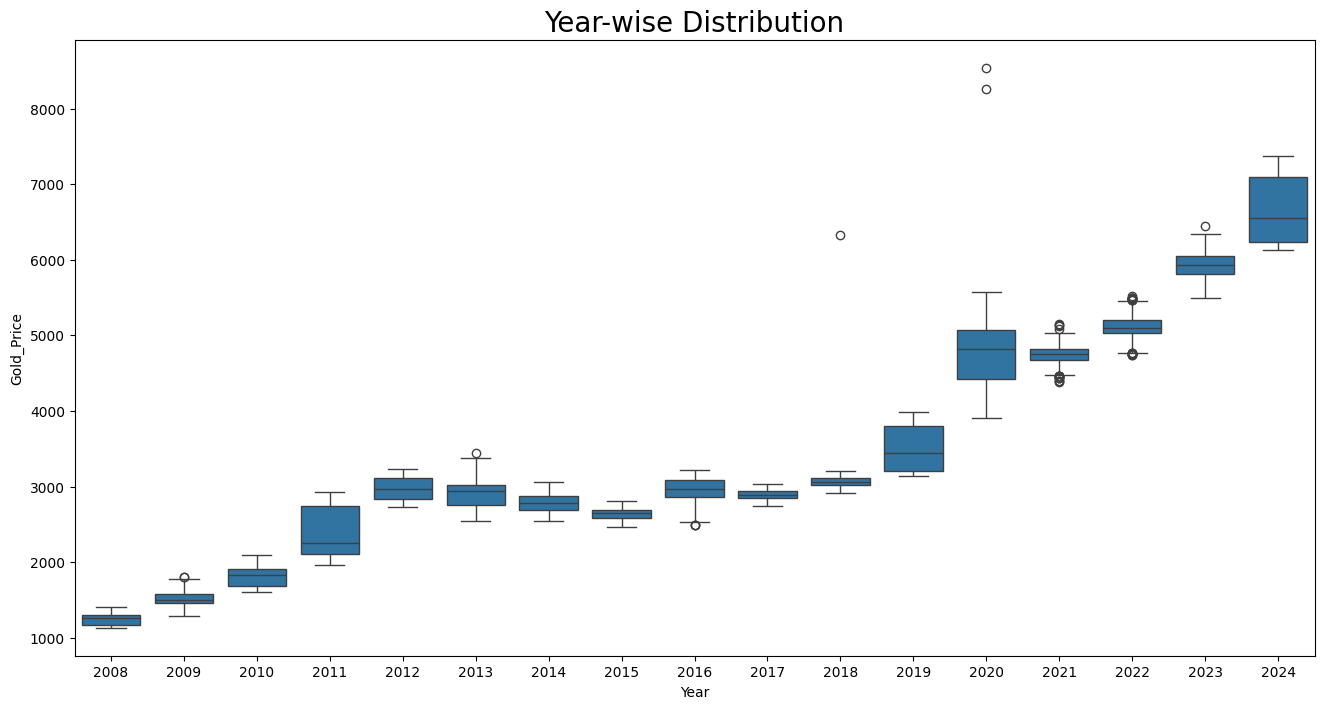

In [80]:
import seaborn as sns

plt.figure(figsize=(16,8))
sns.boxplot(x='Year',y='Gold_Price',data = df)
plt.title('Year-wise Distribution',size = 20)
plt.show()

In [81]:
mean_price = df['Gold_Price'].mean()
variance_price = df['Gold_Price'].var()

print(f"Mean: {mean_price}")
print(f"Variance: {variance_price}")


Mean: 3382.593385214008
Variance: 1793941.6702976488


In [82]:
import statsmodels.tsa.stattools as smt

def check_stationarity(series, title='Time Series'):
    result = smt.adfuller(series)
    print(f'{title} ADF Statistic: {result[0]}')
    print(f'{title} p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    if result[1] > 0.05:
        print(f"{title} is not stationary")
    else:
        print(f"{title} is stationary")

# Check stationarity of the training set
check_stationarity(train_data['Gold_Price'], title='Train Gold_Price')


Train Gold_Price ADF Statistic: -0.5245230091274061
Train Gold_Price p-value: 0.887141505692549
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Train Gold_Price is not stationary


In [83]:
train_data['Gold_diff'] = train_data['Gold_Price'].diff().dropna()

check_stationarity(train_data['Gold_diff'].dropna(), title='Differenced Train Gold_Price')

<ipython-input-83-96031151bfd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Gold_diff'] = train_data['Gold_Price'].diff().dropna()


Differenced Train Gold_Price ADF Statistic: -20.190029433159587
Differenced Train Gold_Price p-value: 0.0
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Differenced Train Gold_Price is stationary


<Figure size 1200x500 with 0 Axes>

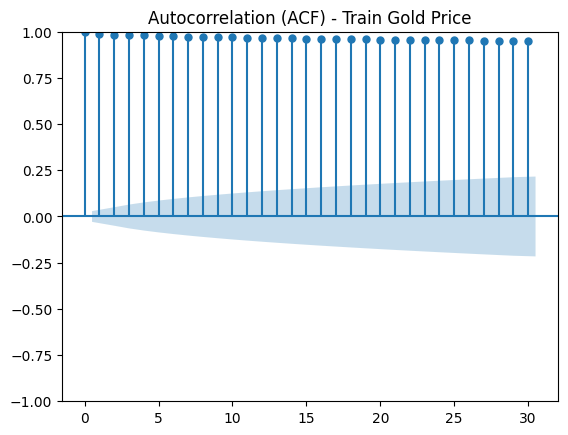

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the autocorrelation function
plt.figure(figsize=(12, 5))
plot_acf(train_data['Gold_Price'], lags=30, title='Autocorrelation (ACF) - Train Gold Price')
plt.show()

<Figure size 1200x500 with 0 Axes>

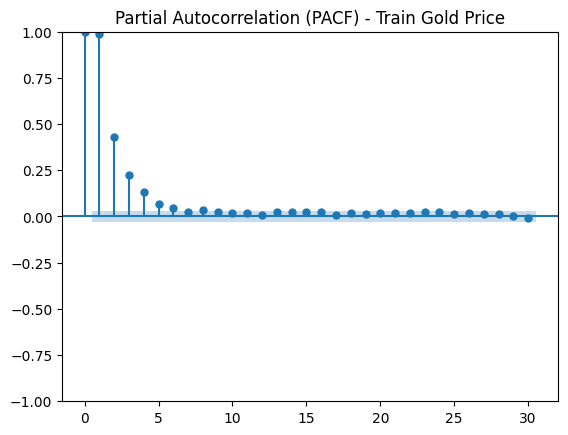

In [85]:
# Plot Partial Autocorrelation (PACF)
plt.figure(figsize=(12, 5))
plot_pacf(train_data['Gold_Price'], lags=30, title='Partial Autocorrelation (PACF) - Train Gold Price')
plt.show()

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

gold_prices = df['Gold_Price']

# Fit ARIMA model
order = (7, 0, 8)
model = ARIMA(gold_prices, order=order)
fitted_model = model.fit()

# Print model summary
print(fitted_model.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             Gold_Price   No. Observations:                 5654
Model:                 ARIMA(7, 0, 8)   Log Likelihood              -34654.452
Date:                Thu, 06 Jun 2024   AIC                          69342.904
Time:                        09:48:53   BIC                          69455.786
Sample:                             0   HQIC                         69382.222
                               - 5654                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3382.5948      0.005   6.47e+05      0.000    3382.585    3382.605
ar.L1          0.3508      0.480      0.731      0.465      -0.590       1.291
ar.L2          0.8577      0.374      2.296      0.0

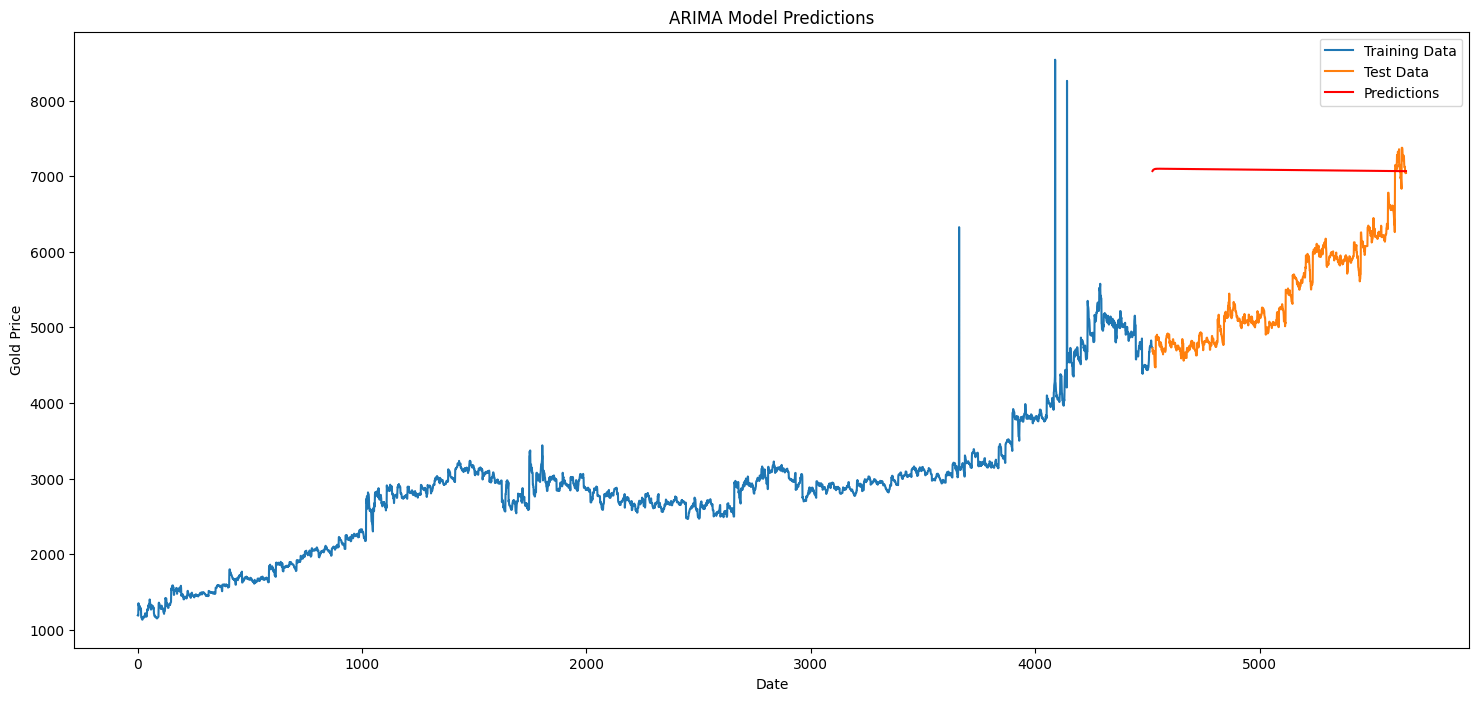

In [107]:
forecast_steps = len(test_data)
forecast = fitted_model.forecast(steps=forecast_steps)

# Plot the actual vs. predicted values
plt.figure(figsize=(18, 8))
plt.plot(train_data.index, train_data['Gold_Price'], label='Training Data')
plt.plot(test_data.index, test_data['Gold_Price'], label='Test Data')
plt.plot(test_data.index, forecast, color='red', label='Predictions')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [94]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'fitted_model' is the fitted ARIMA model object
predictions = fitted_model.forecast(steps=len(test_data))

# Extract only the Gold_Price column for test_data_values
test_data_values = test_data['Gold_Price'].values

# Ensure both are numpy arrays and numeric
test_data_values = np.asarray(test_data_values, dtype=float)
predictions = np.asarray(predictions, dtype=float)

# Calculate accuracy metrics
mae = mean_absolute_error(test_data_values, predictions)
mse = mean_squared_error(test_data_values, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



Mean Absolute Error (MAE): 1378.7409865237635
Mean Squared Error (MSE): 2419818.6751139304
Root Mean Squared Error (RMSE): 1555.5766374929685


In [96]:
aic = fitted_model.aic
bic = fitted_model.bic

print("Akaike Information Criterion (AIC):", aic)
print("Bayesian Information Criterion (BIC):", bic)


Akaike Information Criterion (AIC): 69378.07688559819
Bayesian Information Criterion (BIC): 69471.03854513374


In [97]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(gold_prices, predictions)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Mean Absolute Percentage Error (MAPE): 1.11%


**XGBoost Regressor**

In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [31]:
x = df[['Year','Month','Day']]
y = df['Gold_Price']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:

    xg_reg = xgb.XGBRegressor(objective='reg:squarederror')


    param_grid = {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'n_estimators': [100, 200, 300]
    }


    grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid,
                               cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.6}
Best Score: -12323.71582390189


In [35]:
 best_xg_reg = grid_search.best_estimator_

In [36]:
preds = best_xg_reg.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, preds)
print(f"Mean Squared Error: {mse}")

# Calculate the Accuracy
accuracy = 1 - (mse / y_test.var())
print("Accuracy:", accuracy)

Mean Squared Error: 11397.150473829448
Accuracy: 0.993534144638196


In [38]:
def predict_gold_price(date_str, model):
    date = pd.to_datetime(date_str)
    year = date.year
    month = date.month
    day = date.day
    input_features = pd.DataFrame({'Year': [year], 'Month': [month], 'Day': [day]})
    predicted_price = model.predict(input_features)
    return predicted_price[0]

date_to_predict = '2024-05-29'
predicted_price = predict_gold_price(date_to_predict, best_xg_reg)
print(f"Predicted Gold Price for {date_to_predict}: {predicted_price}")

Predicted Gold Price for 2024-05-29: 7196.7236328125


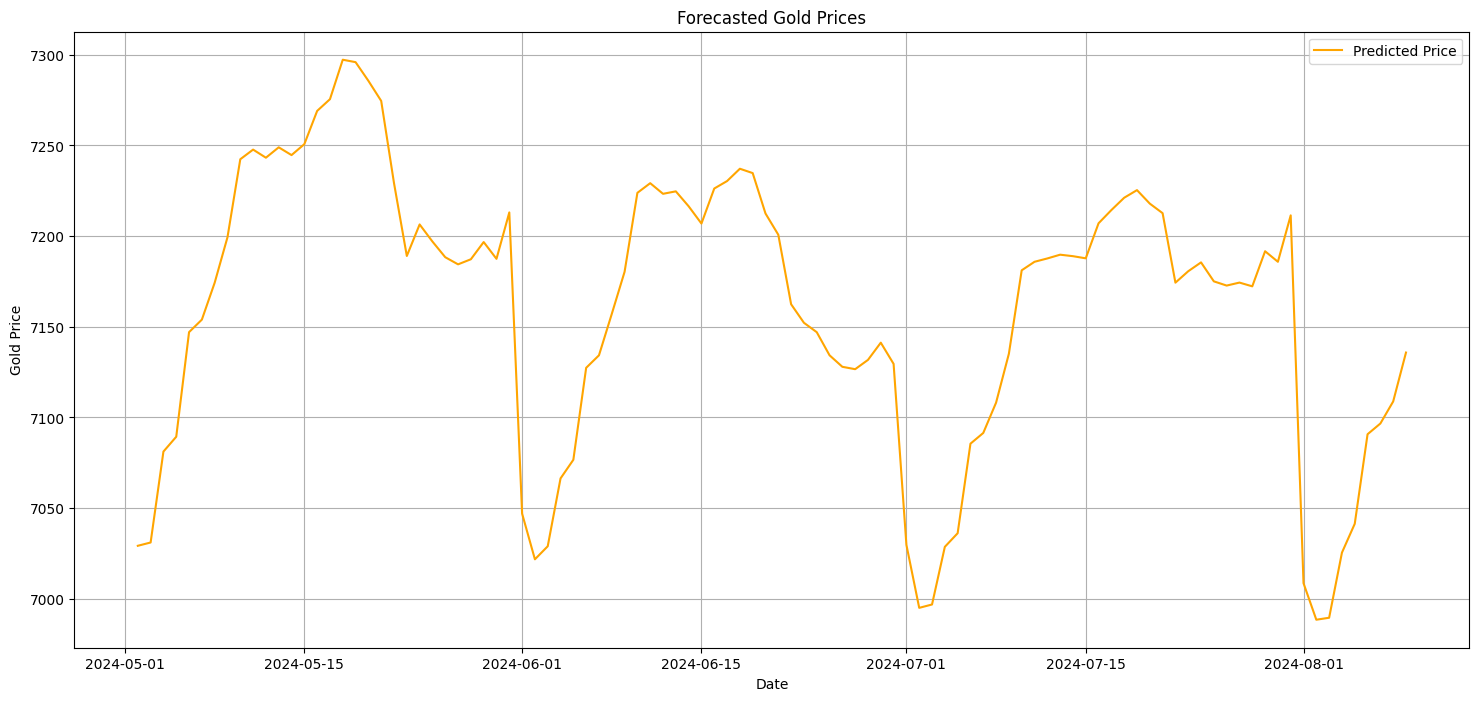

In [39]:
def predict_gold_prices(model, start_date, steps):
    # Initialize an empty DataFrame to store the predicted prices
    forecast = pd.DataFrame(columns=['Date', 'Predicted_Price'])

    # Convert start_date to datetime
    start_date = pd.to_datetime(start_date)

    # Loop through the number of steps and make predictions for each step
    for i in range(1, steps+1):
        # Calculate the date for the current step
        current_date = start_date + pd.DateOffset(days=i)

        # Extract features from the current date
        year = current_date.year
        month = current_date.month
        day = current_date.day

        # Create input features DataFrame for prediction
        input_features = pd.DataFrame({'Year': [year], 'Month': [month], 'Day': [day]})

        # Predict the gold price for the current date
        predicted_price = model.predict(input_features)

        # Append the predicted price to the forecast DataFrame
        forecast = pd.concat([forecast, pd.DataFrame({'Date': [current_date], 'Predicted_Price': predicted_price})], ignore_index=True)

    return forecast

start_date = '2024-05-01'

forecast_steps = 100

forecast = predict_gold_prices(best_xg_reg, start_date, forecast_steps)

plt.figure(figsize=(18, 8))
plt.plot(forecast['Date'], forecast['Predicted_Price'], label='Predicted Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Forecasted Gold Prices')
plt.grid(True)
plt.legend()
plt.show()


In [44]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, preds)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.9935284226423006
